LOAD THE DATASET AND REMOVE DUPLICATE

In [1]:
import pandas as pd

df = pd.read_csv('/content/googleplaystore.csv')

df = df.dropna()
df = df.drop_duplicates()
df['Size'] = df['Size'].replace('Varies with device', )
df['Size'] = df['Size'].str.replace('M','')
df['Size'] = df['Size'].str.replace('k','')
df['Size'] = pd.to_numeric(df['Size'], errors='coerce')


FileNotFoundError: [Errno 2] No such file or directory: '/content/googleplaystore.csv'

CONVERSION

In [ ]:
df['Installs'] = df['Installs'].str.replace(r"[,+]","", regex=True).astype(int)
df['Price'] = df['Price'].str.replace("$","").astype(float)
df['Last Updated'] = pd.to_datetime(df['Last Updated'])



In [ ]:
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [ ]:
df.describe()

,Rating,Installs,Price,Last Updated
count,8886.000000,8.886000e+03,8886.000000,8886
mean,4.187959,1.650061e+07,0.963526,2017-11-22 00:29:00.445644800
min,1.000000,1.000000e+00,0.000000,2010-05-21 00:00:00
25%,4.000000,1.000000e+04,0.000000,2017-09-21 00:00:00
50%,4.300000,5.000000e+05,0.000000,2018-05-28 00:00:00
75%,4.500000,5.000000e+06,0.000000,2018-07-23 00:00:00
max,5.000000,1.000000e+09,400.000000,2018-08-08 00:00:00
std,0.522428,8.640413e+07,16.194792,NaN


TEXT CASES

In [ ]:
df['Category'] = df['Category'].str.lower()
df['Genres'] = df['Genres'].str.lower()

Look final info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8886 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             8886 non-null   object        
 1   Category        8886 non-null   object        
 2   Rating          8886 non-null   float64       
 3   Reviews         8886 non-null   object        
 4   Size            8886 non-null   object        
 5   Installs        8886 non-null   int64         
 6   Type            8886 non-null   object        
 7   Price           8886 non-null   float64       
 8   Content Rating  8886 non-null   object        
 9   Genres          8886 non-null   object        
 10  Last Updated    8886 non-null   datetime64[ns]
 11  Current Ver     8886 non-null   object        
 12  Android Ver     8886 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(9)
memory usage: 971.9+ KB


Type convert category

In [ ]:
df['Type'] = df['Type'].astype('category')
df['Content Rating'] = df['Content Rating'].astype('category')
df['Category'] = df['Category'].astype('category')
df['Genres'] = df['Genres'].astype('category')

             BASIC QWESTIONS

 What is the average rating of apps in the dataset?

In [ ]:
df['Rating'].mean()


np.float64(4.187958586540625)

 How many unique categories of apps are there?

In [ ]:
df['Category'].nunique()


33

What is the distribution of app sizes?

In [ ]:
df['Size']


,Size
0,19M
1,14M
2,8.7M
3,25M
4,2.8M
...,...
10834,2.6M
10836,53M
10837,3.6M
10839,Varies with device


 How many free vs paid apps are there?

In [ ]:
df['Type'].value_counts()


,count
Type,
Free,8275
Paid,611


What is the most common content rating for apps?

In [ ]:
df['Content Rating'].mode()[0]


'Everyone'

What are the top 5 most installed apps?

In [ ]:
df.sort_values('Installs', ascending=False).head(5)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_MB
3232,Google Street View,travel_and_local,4.2,2129707,Varies with device,1000000000,Free,0.0,Everyone,travel & local,2018-08-06,Varies with device,Varies with device,NaN
3223,Maps - Navigate & Explore,travel_and_local,4.3,9235373,Varies with device,1000000000,Free,0.0,Everyone,travel & local,2018-07-31,Varies with device,Varies with device,NaN
9844,Google News,news_and_magazines,3.9,878065,13M,1000000000,Free,0.0,Teen,news & magazines,2018-08-01,5.2.0,4.4 and up,13.0
386,Hangouts,communication,4.0,3419433,Varies with device,1000000000,Free,0.0,Everyone,communication,2018-07-21,Varies with device,Varies with device,NaN
391,Skype - free IM & video calls,communication,4.1,10484169,Varies with device,1000000000,Free,0.0,Everyone,communication,2018-08-03,Varies with device,Varies with device,NaN


 How many apps have a rating of 4.0 and above?

In [ ]:
df[df['Rating']>=4.0].shape[0]


6942

What is the average app size for each category?

In [ ]:
df.groupby('Category')['Size'].mean()


,Size
Category,
ART_AND_DESIGN,13.270492
AUTO_AND_VEHICLES,23.483562
BEAUTY,14.804762
BOOKS_AND_REFERENCE,23.922034
BUSINESS,24.827407
COMICS,34.153448
COMMUNICATION,55.935179
DATING,18.034591
EDUCATION,28.513953


 How many apps were last updated in 2018?

In [ ]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')
df[df['Last Updated'].dt.year == 2018].shape[0]




6095

              MEDIUM QWESTION

What is the correlation between the number of installs and the app rating

In [ ]:
df['Installs'] = df['Installs'].astype(str).str.replace(',','').str.replace('+','').astype(int)
df['Installs'].corr(df['Rating'])





np.float64(0.05086906567316967)

Which app categories have the highest average rating?

In [ ]:
df.groupby('Category')['Rating'].mean().sort_values(ascending=False)


,Rating
Category,
EVENTS,4.435556
ART_AND_DESIGN,4.377049
EDUCATION,4.375969
BOOKS_AND_REFERENCE,4.347458
PERSONALIZATION,4.333117
PARENTING,4.300000
GAME,4.281285
BEAUTY,4.278571
HEALTH_AND_FITNESS,4.261450


 How does the price of an app affect its average rating?

In [ ]:
df[df['Price']>0].groupby('Price')['Rating'].mean()

,Rating
Price,
0.99,4.300962
1.00,4.450000
1.20,4.200000
1.29,4.100000
1.49,4.190000
...,...
299.99,3.800000
379.99,2.900000
389.99,3.600000


What is the distribution of app ratings across different content ratings?

<Axes: title={'center': 'Rating'}, xlabel='Content Rating'>

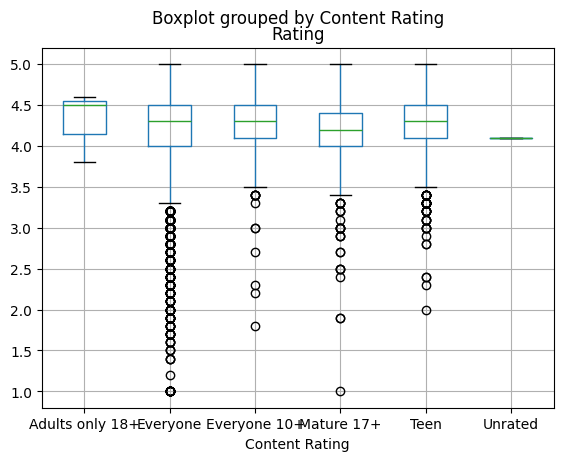

In [ ]:
df.boxplot(column='Rating', by='Content Rating')


 Which genres have the most apps with over 1 million installs?

In [ ]:
df[df['Installs']>1000000].groupby('Genres').size().sort_values(ascending=False)


,0
Genres,
Tools,187
Action,182
Photography,161
Communication,146
Productivity,124
...,...
Parenting,1
Role Playing;Brain Games,1
Parenting;Music & Video,1


How frequently do apps get updated? Calculate the average time between updates.

In [ ]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')
df['year'] = df['Last Updated'].dt.year
df['year'].value_counts().sort_index()



,count
year,
2010,1
2011,15
2012,21
2013,91
2014,185
2015,383
2016,638
2017,1457
2018,6095


 What is the impact of app size on the number of installs?

<Axes: xlabel='Size', ylabel='Installs'>

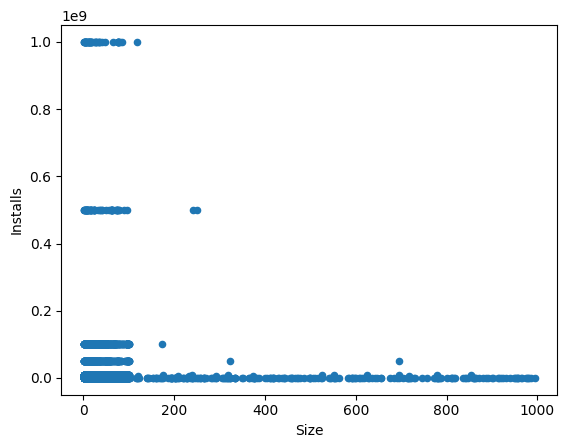

In [ ]:
df.plot.scatter(x='Size', y='Installs')


Which apps have the highest number of reviews, and what are their ratings?

In [ ]:
df.sort_values('Reviews', ascending=False)[['App','Reviews','Rating']].head(10)


,App,Reviews,Rating
2989,GollerCepte Live Score,9992,4.2
4970,Ad Block REMOVER - NEED ROOT,999,3.3
2705,SnipSnap Coupon App,9975,4.2
3229,DreamTrips,9971,4.7
3049,US Open Tennis Championships 2018,9971,4.0
7002,Adult Color by Number Book - Paint Mandala Pages,997,4.3
6724,BSPlayer ARMv7 VFP CPU support,9966,4.3
7982,"Easy Resume Builder, Resume help, Curriculum v...",996,4.3
353,MegaFon Dashboard,99559,3.7
326,Buff Thun - Daily Free Webtoon / Comics / Web ...,9952,4.5


How does the content rating distribution differ between free and paid apps?

In [ ]:
pd.crosstab(df['Content Rating'], df['Type'])


Type,Free,Paid
Content Rating,,
Adults only 18+,3,0
Everyone,6571,518
Everyone 10+,328,32
Mature 17+,395,16
Teen,977,45
Unrated,1,0


   ADVANE LEVEL QWESTION

 What are the top 10 apps with the highest ratings, and how do their number of reviews and installs compare?

In [ ]:
top10 = df.sort_values(by='Rating', ascending=False)[['App','Rating','Reviews','Installs']].head(10)
top10


,App,Rating,Reviews,Installs
9705,EP Radio,5.0,3,50
9701,EP Church Annapolis,5.0,2,100
10837,Fr. Mike Schmitz Audio Teachings,5.0,4,100
8526,DL Image Manager,5.0,2,10
8601,DN Calculators,5.0,12,100
8596,DN Employee,5.0,1,10
8591,DN Blog,5.0,20,10
4452,P-Home for KLWP,5.0,4,100
6700,Brick Breaker BR,5.0,7,5
6823,Barisal University App-BU Face,5.0,100,1000


Analyze the trend of app updates over time. Are there any noticeable patterns or seasonal trends?


In [ ]:
df['Year'].value_counts().sort_index()
df['Month'].value_counts().sort_index()


,count
Month,
1,397
2,415
3,538
4,483
5,817
6,1059
7,2630
8,1352
9,252


How does the average rating of apps change with the number of installs? Create a binned analysis.

In [ ]:
bins = [0, 10000, 100000, 1000000, 10000000, df['Installs'].max()]
labels = ['0-10K','10K-100K','100K-1M','1M-10M','10M+']

df['install_bin'] = pd.cut(df['Installs'], bins=bins, labels=labels)

df.groupby('install_bin')['Rating'].mean()


/tmp/ipython-input-4194385224.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('install_bin')['Rating'].mean()


,Rating
install_bin,
0-10K,4.112514
10K-100K,4.094653
100K-1M,4.207100
1M-10M,4.285675
10M+,4.372170


 What is the relationship between app genre and user ratings? Are certain genres consistently rated higher or lower?

In [ ]:
df.groupby('Genres')['Rating'].mean().sort_values(ascending=False)


,Rating
Genres,
Board;Pretend Play,4.800000
Comics;Creativity,4.800000
Health & Fitness;Education,4.700000
Puzzle;Education,4.600000
Strategy;Action & Adventure,4.600000
...,...
Art & Design;Pretend Play,3.900000
Health & Fitness;Action & Adventure,3.900000
Educational,3.871875


        SUMMARY
  (Genre vs Ratings Analysis):

Apps which belong to useful / productivity-based genres like Education, Books, Health & Fitness generally have higher average ratings.
Entertainment based genres like Casual Games, Action Games, and Dating apps show comparatively lower ratings because users expectations are higher, ads bugs issues zyada hote hai.